importing data

In [55]:
import csv
import matplotlib.pyplot as plt
import pandas as pd


In [62]:
data = pd.read_csv("data/cia_factbook.csv")

In [63]:
data.dtypes


country                     object
area                       float64
birth_rate                 float64
death_rate                 float64
infant_mortality_rate      float64
internet_users             float64
life_exp_at_birth          float64
maternal_mortality_rate    float64
net_migration_rate         float64
population                 float64
population_growth_rate     float64
dtype: object

In [64]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  259 non-null    object 
 1   area                     257 non-null    float64
 2   birth_rate               224 non-null    float64
 3   death_rate               225 non-null    float64
 4   infant_mortality_rate    224 non-null    float64
 5   internet_users           213 non-null    float64
 6   life_exp_at_birth        224 non-null    float64
 7   maternal_mortality_rate  184 non-null    float64
 8   net_migration_rate       222 non-null    float64
 9   population               238 non-null    float64
 10  population_growth_rate   233 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.4+ KB


In [65]:
with open('data/cia_factbook.csv','r',encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    data = [row for row in reader]
    csvfile.close()
data[0]


{'country': 'Russia',
 'area': '17098242',
 'birth_rate': '11.87',
 'death_rate': '13.83',
 'infant_mortality_rate': '7.08',
 'internet_users': '40853000',
 'life_exp_at_birth': '70.16',
 'maternal_mortality_rate': '34',
 'net_migration_rate': '1.69',
 'population': '142470272',
 'population_growth_rate': '-0.03'}

In [66]:
data.describe()


AttributeError: 'list' object has no attribute 'describe'

In [61]:
data.head()


AttributeError: 'list' object has no attribute 'head'

In [53]:
def toFloat(str):
    if str=='NA':
        return 0
    else:
        return float(str)

internet = [toFloat(d['internet_users']) for d in data]
pop = [toFloat(d['population']) for d in data]
exp = [toFloat(d['life_exp_at_birth']) for d in data]
mig = [toFloat(d['net_migration_rate']) for d in data]
print(len(internet), len(exp),len(mig),len(pop))

TypeError: string indices must be integers

In [48]:
data.loc[data['birth_rate']>15,'country']

6                                  India
7                              Argentina
8                             Kazakhstan
9                                Algeria
10     Congo, Democratic Republic of the
                     ...                
205                             Maldives
211                       American Samoa
212                     Marshall Islands
229                               Tuvalu
230                                Nauru
Name: country, Length: 132, dtype: object

In [54]:
data[['population','country']].groupby('population').mean()

/Users/pouneh/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
population
4.800000e+01
5.960000e+02
8.420000e+02
1.190000e+03
1.337000e+03
...
2.536096e+08
3.188921e+08
5.114348e+08


Text(0, 0.5, 'life expectancy')

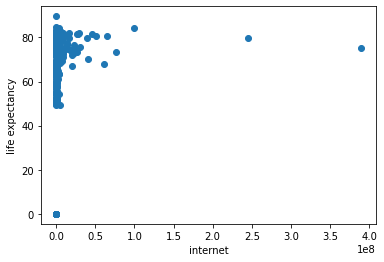

In [8]:
plt.scatter(internet,exp)
plt.xlabel('internet')
plt.ylabel('life expectancy')

Text(0, 0.5, 'migration')

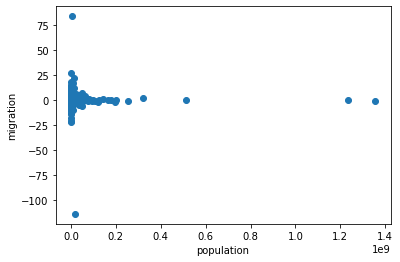

In [41]:
plt.scatter(pop,mig)
plt.xlabel('population')
plt.ylabel('migration')

In [37]:
frlist = [(toFloat(d['population']),d['country'])
            for d in data]
frlist = sorted(frlist,reverse=True)
frlist

[(1355692576.0, 'China'),
 (1236344631.0, 'India'),
 (511434812.0, 'European Union'),
 (318892103.0, 'United States'),
 (253609643.0, 'Indonesia'),
 (202656788.0, 'Brazil'),
 (196174380.0, 'Pakistan'),
 (177155754.0, 'Nigeria'),
 (166280712.0, 'Bangladesh'),
 (142470272.0, 'Russia'),
 (127103388.0, 'Japan'),
 (120286655.0, 'Mexico'),
 (107668231.0, 'Philippines'),
 (96633458.0, 'Ethiopia'),
 (93421835.0, 'Vietnam'),
 (86895099.0, 'Egypt'),
 (81619392.0, 'Turkey'),
 (80996685.0, 'Germany'),
 (80840713.0, 'Iran'),
 (77433744.0, 'Congo, Democratic Republic of the'),
 (67741401.0, 'Thailand'),
 (66259012.0, 'France'),
 (63742977.0, 'United Kingdom'),
 (61680122.0, 'Italy'),
 (55746253.0, 'Burma'),
 (49639138.0, 'Tanzania'),
 (49039986.0, 'Korea, South'),
 (48375645.0, 'South Africa'),
 (47737941.0, 'Spain'),
 (46245297.0, 'Colombia'),
 (45010056.0, 'Kenya'),
 (44291413.0, 'Ukraine'),
 (43024374.0, 'Argentina'),
 (38813722.0, 'Algeria'),
 (38346279.0, 'Poland'),
 (35918915.0, 'Uganda'),
 (3

In [36]:
frlist2 = [(toFloat(d['net_migration_rate']),d['country'])
            for d in data]
frlist2 = sorted(frlist,reverse=True)
frlist2

[(389000000.0, 'China'),
 (245000000.0, 'United States'),
 (99182000.0, 'Japan'),
 (75982000.0, 'Brazil'),
 (65125000.0, 'Germany'),
 (61338000.0, 'India'),
 (51444000.0, 'United Kingdom'),
 (45262000.0, 'France'),
 (40853000.0, 'Russia'),
 (39400000.0, 'Korea, South'),
 (31020000.0, 'Mexico'),
 (29235000.0, 'Italy'),
 (28119000.0, 'Spain'),
 (27233000.0, 'Turkey'),
 (26960000.0, 'Canada'),
 (23382000.0, 'Vietnam'),
 (22538000.0, 'Colombia'),
 (22452000.0, 'Poland'),
 (20431000.0, 'Pakistan'),
 (20136000.0, 'Egypt'),
 (20000000.0, 'Indonesia'),
 (17483000.0, 'Thailand'),
 (16147000.0, 'Taiwan'),
 (15810000.0, 'Australia'),
 (15355000.0, 'Malaysia'),
 (14872000.0, 'Netherlands'),
 (13694000.0, 'Argentina'),
 (13213000.0, 'Morocco'),
 (9774000.0, 'Saudi Arabia'),
 (9158000.0, 'Peru'),
 (8918000.0, 'Venezuela'),
 (8398000.0, 'Sweden'),
 (8278000.0, 'Philippines'),
 (8214000.0, 'Iran'),
 (8113000.0, 'Belgium'),
 (7787000.0, 'Romania'),
 (7770000.0, 'Ukraine'),
 (7009000.0, 'Chile'),
 (6681